In [86]:
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab

import pandas as pd
from collections import defaultdict
import json
from IPython.display import display


from PIL import Image

pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [87]:
train_coco = COCO('../annot/modified_train_annotations.json')
val_coco = COCO('../annot/modified_val_annotations.json')

IMG_DIR = '/Users/amee/Library/CloudStorage/GoogleDrive-ameeassad@gmail.com/My Drive/artportalen_goeag'

loading annotations into memory...
Done (t=0.36s)
creating index...
index created!
loading annotations into memory...
Done (t=0.11s)
creating index...
index created!


In [88]:
def create_df_from_coco(coco_obj):
    # Extract image info and create a dictionary to map image IDs to filenames, height, and width
    images_info = coco_obj.dataset['images']
    image_id_to_info = {image['id']: {'file_name': image['file_name'], 'height': image['height'], 'width': image['width']} for image in images_info}

    # Extract category info and create a dictionary to map category IDs to category names
    categories_info = coco_obj.dataset['categories']
    category_id_to_name = {category['id']: category['name'] for category in categories_info}

    # Extract annotations info and prepare data for the DataFrame
    annotations_info = coco_obj.dataset['annotations']
    annotations_data = []

    for annotation in annotations_info:
        image_id = annotation['image_id']
        category_id = annotation['category_id']
        image_info = image_id_to_info[image_id]
        
        annotation_data = {
            'image_id': annotation['image_id'],
            'image_filename': image_info['file_name'],
            'height': image_info['height'],        # Save height
            'width': image_info['width'],          # Save width
            'category_id': annotation['category_id'],
            'category_name': category_id_to_name[category_id],
            'bbox': annotation['bbox'],
            'area': annotation['area'],
            'iscrowd': annotation['iscrowd'],
            'segmentation': annotation['segmentation']
        }
        annotations_data.append(annotation_data)

    # Create the DataFrame
    df = pd.DataFrame(annotations_data)

    # Display the DataFrame
    display(df.head())

    return df

In [89]:
train_df = create_df_from_coco(train_coco)
val_df = create_df_from_coco(val_coco)

,image_id,image_filename,height,width,category_id,category_name,bbox,area,iscrowd,segmentation
0,1599,1989945,1600,1200,4,4K,"[765.0, 485.0, 215.0, 287.5]",31337,0,"[[780.0, 485.0, 780.0, 495.0, 775.0, 500.0, 76..."
1,3109,4290677,1600,900,1,1K,"[725.0, 415.0, 137.5, 47.5]",4653,0,"[[725.0, 415.0, 725.0, 430.0, 735.0, 430.0, 73..."
2,1357,1700224,1600,1068,5,5K_plus,"[825.0, 429.0, 185.0, 335.0]",26121,0,"[[965.0, 429.0, 965.0, 436.5, 952.5, 449.0, 95..."
3,281,944615,480,376,1,1K,"[139.5, 159.5, 236.25, 61.49998474121094]",7171,0,"[[230.25, 159.5, 230.25, 161.75, 229.5, 162.5,..."
4,1090,1484885,913,685,1,1K,"[345.1875, 99.89583587646484, 305.395874023437...",68695,0,"[[449.3645935058594, 99.89583587646484, 449.36..."


,image_id,image_filename,height,width,category_id,category_name,bbox,area,iscrowd,segmentation
0,819,4385178,1600,1064,2,2K,"[915.0, 327.0, 277.5, 157.5]",22059,0,"[[970.0, 327.0, 970.0, 334.5, 960.0, 344.5, 96..."
1,705,3741043,1600,1066,2,2K,"[535.0, 237.99998474121094, 777.5, 617.5000152...",207259,0,"[[930.0, 237.99998474121094, 930.0, 250.499984..."
2,412,1996882,1600,1600,5,5K_plus,"[765.0, 865.0, 277.5, 177.5]",12193,0,"[[1002.5, 865.0, 1002.5, 872.5, 972.5, 902.5, ..."
3,726,3776039,1024,682,5,5K_plus,"[368.0, 88.19999694824219, 305.5999755859375, ...",65207,0,"[[456.0, 88.19999694824219, 456.0, 93.0, 454.3..."
4,786,4317954,1600,1067,1,1K,"[505.0, 278.5, 132.5, 104.99996948242188]",6796,0,"[[505.0, 278.5, 505.0, 291.0, 512.5, 291.0, 51..."


In [90]:
raw_df = pd.read_csv('artportalen_goleag_db - output.csv')
raw_df.head()

,video,imageID,url,species,quantity,age_class,activity,plus_minus_exact,split,date,...,Main premises,Province,Land,City,Municipality,Locality,ATLAS SQUARE 5X5,WATER AREA SUB-DRAINAGE AREA,Created,REDACTED
0,0,4964211,1-rOJhKt14k1EMBQED4CeW83dUT4VX3VC,goleag,1,2K,foraging,0,NaN,2023-12-16,...,Halleberg,Västergötland,Västra Götaland,Vänersborg,Vänersnäs,Vänersnäs,08C5a (08C5a),Göta Älv (108000),2023-12-16,2023-12-16 19:21:34
1,0,4962788,1K-a--MW7z3FnULtB1YQkncQGg8_MSQWn,goleag,1,NaN,foraging,0,test,2023-12-14,...,NaN,Småland,Jönköping,Gnosjö,Kävsjö,Kävsjö,06D0h (06D0h),Lagan (98000),2023-12-14,2023-12-14 21:55:41
2,0,4962584,1G-xq7kKBInr4PN3KS4hkb6QL2dzXQoWu,goleag,1,2K,foraging,1,NaN,2023-12-13,...,Svanaholms ängar,Småland,Jönköping,Värnamo,Torskinge,Torskinge,05D6e (05D6e),Lagan (98000),2023-12-13,2023-12-13 14:10:15
3,0,4962583,1IE_Cw2oVMt9ZpqZJhwNIwdcP3-2xxqaz,goleag,1,2K,foraging,1,NaN,2023-12-13,...,Svanaholms ängar,Småland,Jönköping,Värnamo,Torskinge,Torskinge,05D6e (05D6e),Lagan (98000),2023-12-13,2023-12-13 14:10:15
4,0,4962000,1zjwWIbtemv_RHszDAzipHRggB_7240BW,goleag,1,5K_plus,stationary,0,NaN,2023-12-13,...,NaN,Småland,Jönköping,Jönköping,Norra Mo,Norra Unnaryd,06D8g (06D8g),Nissan (101000),2023-12-13,2023-12-13 18:22:21


In [91]:
train_df['image_filename'] = train_df['image_filename'].astype(int)
val_df['image_filename'] = val_df['image_filename'].astype(int)

new_train_df = pd.merge(train_df, raw_df[['imageID', 'SightingID', 'activity', 'date', 'easting_coord','northing_coord','coordinate_system','accuracy_plusminus_meter', 'Reporter']], left_on='image_filename', right_on='imageID', how='left')
new_train_df = new_train_df.drop(columns=['imageID']) # drop the extra 'imageID' column that was added from raw_df

new_val_df = pd.merge(val_df, raw_df[['imageID', 'SightingID', 'activity', 'date', 'easting_coord','northing_coord','coordinate_system','accuracy_plusminus_meter', 'Reporter']], left_on='image_filename', right_on='imageID', how='left')
new_val_df = new_val_df.drop(columns=['imageID'])



# Display the combined DataFrame
new_train_df.head()

,image_id,image_filename,height,width,category_id,category_name,bbox,area,iscrowd,segmentation,SightingID,activity,date,easting_coord,northing_coord,coordinate_system,accuracy_plusminus_meter,Reporter
0,1599,1989945,1600,1200,4,4K,"[765.0, 485.0, 215.0, 287.5]",31337,0,"[[780.0, 485.0, 780.0, 495.0, 775.0, 500.0, 76...",68770411,foraging,2017-12-29,O1471566,N6480673,RT90 2.5 gon,500,"Berndth Gustafsson,\nLinköping"
1,3109,4290677,1600,900,1,1K,"[725.0, 415.0, 137.5, 47.5]",4653,0,"[[725.0, 415.0, 725.0, 430.0, 735.0, 430.0, 73...",104217558,NaN,2022-10-20,O1352120,N6150730,RT90 2.5 gon,400,"Ragnar Alm,\nMalmö"
2,1357,1700224,1600,1068,5,5K_plus,"[825.0, 429.0, 185.0, 335.0]",26121,0,"[[965.0, 429.0, 965.0, 436.5, 952.5, 449.0, 95...",62597327,stationary,2016-12-27,O1573526,N6625285,RT90 2.5 gon,2501,"Henrik Johansson,\nKUNGSÄNGEN"
3,281,944615,480,376,1,1K,"[139.5, 159.5, 236.25, 61.49998474121094]",7171,0,"[[230.25, 159.5, 230.25, 161.75, 229.5, 162.5,...",34346327,flying by,2009-12-12,O1641269,N6383417,RT90 2.5 gon,5804,"Ulf Lidberg,\nVisby"
4,1090,1484885,913,685,1,1K,"[345.1875, 99.89583587646484, 305.395874023437...",68695,0,"[[449.3645935058594, 99.89583587646484, 449.36...",55912092,foraging,2015-11-22,O1539521,N6236332,RT90 2.5 gon,200,"Ronnie Nederfeldt,\nDegerhamn"


In [92]:
nan_sighting_ids = new_train_df['SightingID'].isna()
nan_count = nan_sighting_ids.sum()

# Print the number of NaN values
print(f"Number of NaN values in 'SightingID': {nan_count}")

Number of NaN values in 'SightingID': 0


In [93]:
# check if new_train_df and new_val_df have any overlapping values in the SightingID column

# Get the unique SightingID values from both DataFrames
train_sighting_ids = set(new_train_df['SightingID'].unique())
val_sighting_ids = set(new_val_df['SightingID'].unique())

# Find the intersection (overlap) between the two sets
overlap_sighting_ids = train_sighting_ids.intersection(val_sighting_ids)

# Check if there is any overlap
if overlap_sighting_ids:
    print(f"Overlap found in SightingID columns: {len(overlap_sighting_ids)} overlapping IDs")
    print(overlap_sighting_ids)

Overlap found in SightingID columns: 458 overlapping IDs
{91381767, 47618067, 104073240, 31301657, 57712673, 81524779, 82001963, 52023341, 52197419, 90196016, 25591858, 43993151, 98889791, 62072901, 62617672, 98175054, 73914452, 88631382, 98097238, 104786009, 70135898, 51474521, 62623834, 51920992, 61925474, 113416293, 68464747, 69707887, 56254576, 57397369, 89792637, 81692801, 80175242, 81184907, 80640141, 112912533, 22683802, 34590874, 75790492, 75636897, 53289131, 69818540, 89626810, 47825090, 91195600, 62871763, 61638879, 81776872, 104220905, 101753068, 62632173, 91275510, 104700157, 68661503, 112593163, 35074318, 80109841, 48183575, 108095773, 34345246, 56234276, 62585129, 69609778, 55691576, 75639097, 51204408, 113121598, 69472576, 57000258, 63322436, 62355780, 88912204, 61374801, 38486363, 22417766, 31363431, 48183659, 69718385, 41173364, 57098616, 52345212, 76091772, 48214400, 52382082, 51515782, 88547721, 110791055, 113406359, 97780124, 108902813, 69355939, 80722340, 68549041,

### warning: CANNOT simply concatenate train_df and val_df because the image_ids will overlap!

Let's just remove image_id and then re-add it after we re-do the train-test split. It should work because each row represents an annotation.

In [94]:
# lets combine train and val again and do the split again

combined_df = pd.concat([new_train_df, new_val_df], ignore_index=True)

combined_df.drop(columns=['image_id'], inplace=True)



In [95]:
# Create the 'annot_id' column as the index
combined_df['annot_id'] = combined_df.index

# Create the 'image_id' column by converting 'image_filename' to categorical and then to codes
combined_df['image_id'] = combined_df['image_filename'].astype('category').cat.codes

combined_df.head()

,image_filename,height,width,category_id,category_name,bbox,area,iscrowd,segmentation,SightingID,activity,date,easting_coord,northing_coord,coordinate_system,accuracy_plusminus_meter,Reporter,annot_id,image_id
0,1989945,1600,1200,4,4K,"[765.0, 485.0, 215.0, 287.5]",31337,0,"[[780.0, 485.0, 780.0, 495.0, 775.0, 500.0, 76...",68770411,foraging,2017-12-29,O1471566,N6480673,RT90 2.5 gon,500,"Berndth Gustafsson,\nLinköping",0,1909
1,4290677,1600,900,1,1K,"[725.0, 415.0, 137.5, 47.5]",4653,0,"[[725.0, 415.0, 725.0, 430.0, 735.0, 430.0, 73...",104217558,NaN,2022-10-20,O1352120,N6150730,RT90 2.5 gon,400,"Ragnar Alm,\nMalmö",1,3655
2,1700224,1600,1068,5,5K_plus,"[825.0, 429.0, 185.0, 335.0]",26121,0,"[[965.0, 429.0, 965.0, 436.5, 952.5, 449.0, 95...",62597327,stationary,2016-12-27,O1573526,N6625285,RT90 2.5 gon,2501,"Henrik Johansson,\nKUNGSÄNGEN",2,1620
3,944615,480,376,1,1K,"[139.5, 159.5, 236.25, 61.49998474121094]",7171,0,"[[230.25, 159.5, 230.25, 161.75, 229.5, 162.5,...",34346327,flying by,2009-12-12,O1641269,N6383417,RT90 2.5 gon,5804,"Ulf Lidberg,\nVisby",3,331
4,1484885,913,685,1,1K,"[345.1875, 99.89583587646484, 305.395874023437...",68695,0,"[[449.3645935058594, 99.89583587646484, 449.36...",55912092,foraging,2015-11-22,O1539521,N6236332,RT90 2.5 gon,200,"Ronnie Nederfeldt,\nDegerhamn",4,1290


In [96]:
image_id_counts = combined_df.groupby(['image_id', 'image_filename']).size().reset_index(name='count')
print(image_id_counts.loc[image_id_counts['count'] > 1])


      image_id  image_filename  count
34          34          772102      5
136        136          825265     12
140        140          825702      3
142        142          826002     23
701        701         1137741      6
733        733         1203395      3
774        774         1209191      5
981        981         1310733      4
1852      1852         1966285      3
2261      2261         2271189      8
2775      2775         2761018      9
2803      2803         3062920      4
2859      2859         3126706      9
2999      2999         3209081      2
3261      3261         3714867     22
3268      3268         3719964      5
3377      3377         3756492      7
3441      3441         3774900      8


In [97]:
from sklearn.model_selection import train_test_split

In [98]:
# Get the unique sighting_IDs
unique_sighting_ids = combined_df['SightingID'].unique()

# Create a mapping from sighting_ID to the corresponding age_class
sighting_id_to_age_class = combined_df.groupby('SightingID')['category_id'].first()

# Prepare the stratify array using the age_class for each sighting_ID
stratify_labels = sighting_id_to_age_class.loc[unique_sighting_ids].values

# Split the unique sighting_IDs into train and validation sets
train_ids, val_ids = train_test_split(unique_sighting_ids, test_size=0.2, random_state=42, stratify=stratify_labels)

# Create train and validation DataFrames by selecting the rows based on the split sighting_IDs
train_split = combined_df[combined_df['SightingID'].isin(train_ids)].reset_index(drop=True)
val_split = combined_df[combined_df['SightingID'].isin(val_ids)].reset_index(drop=True)

# Optionally, reset index for the new DataFrames
train_split = train_split.reset_index(drop=True)
val_split = val_split.reset_index(drop=True)

# Display the size of each split
print(f"Training set size: {len(train_split)}")
print(f"Val set size: {len(val_split)}")



Training set size: 3482
Val set size: 840


In [99]:
#check again if no overlapp in sightings between train and val
train_sighting_ids = set(train_split['SightingID'].unique())
val_sighting_ids = set(val_split['SightingID'].unique())

# Find the intersection (overlap) between the two sets
overlap_sighting_ids = train_sighting_ids.intersection(val_sighting_ids)

# Check if there is any overlap
if overlap_sighting_ids:
    print(f"Overlap found in SightingID columns: {len(overlap_sighting_ids)} overlapping IDs")
    print(overlap_sighting_ids)
else:
    print("No overlap found in SightingID columns")

No overlap found in SightingID columns


In [100]:
# Group by 'filename' and check the number of unique 'SightingID's for each group
sighting_id_consistency = combined_df.groupby('image_filename')['SightingID'].nunique() #filename is fine

# Find any filename that has more than one unique SightingID
inconsistent_image_ids = sighting_id_consistency[sighting_id_consistency > 1]

# Check if there are any inconsistencies
if not inconsistent_image_ids.empty:
    print("Inconsistencies found:")
    print(inconsistent_image_ids)
else:
    print("All filename entries have consistent SightingID.")


All filename entries have consistent SightingID.


category_id
1     672
2    1207
3     626
4     312
5     665
Name: count, dtype: int64


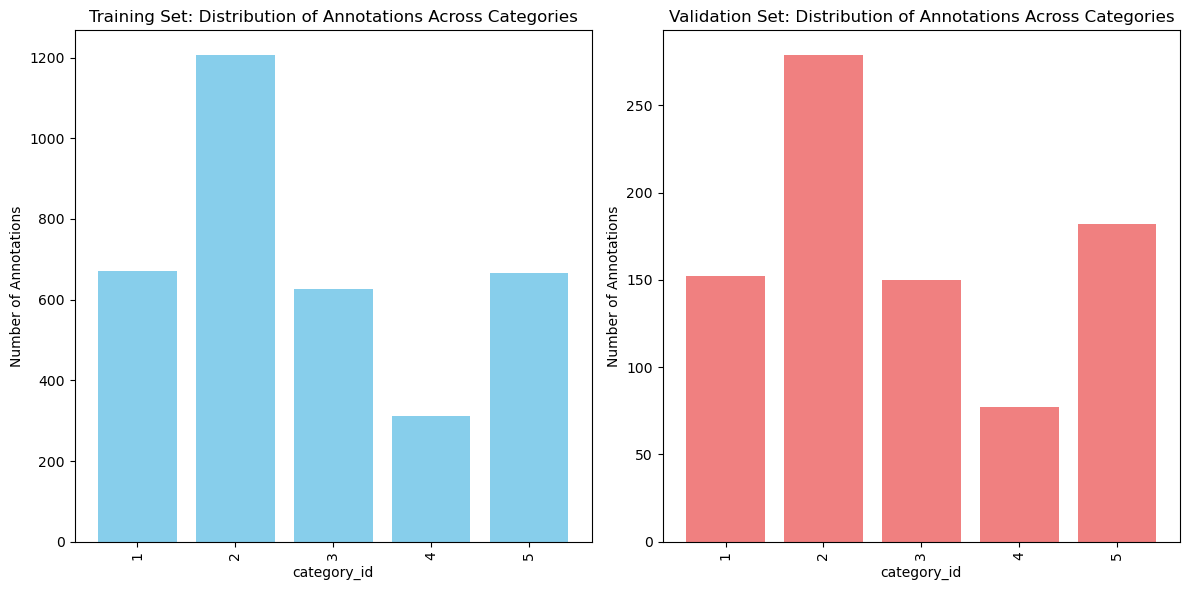

In [101]:
# Plot the distribution for training and validation sets
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Group by category_id and count the occurrences
category_counts_train = train_split['category_id'].value_counts().sort_index()
category_counts_val = val_split['category_id'].value_counts().sort_index()

print(category_counts_train.head())

# Plotting the bar chart
axes[0].bar(category_counts_train.index, category_counts_train.values, color='skyblue')
axes[0].set_xlabel('category_id')
axes[0].set_ylabel('Number of Annotations')
axes[0].set_title('Training Set: Distribution of Annotations Across Categories')
axes[0].tick_params(axis='x', rotation=90)

# Plotting the bar chart for validation set
axes[1].bar(category_counts_val.index, category_counts_val.values, color='lightcoral')
axes[1].set_xlabel('category_id')
axes[1].set_ylabel('Number of Annotations')
axes[1].set_title('Validation Set: Distribution of Annotations Across Categories')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

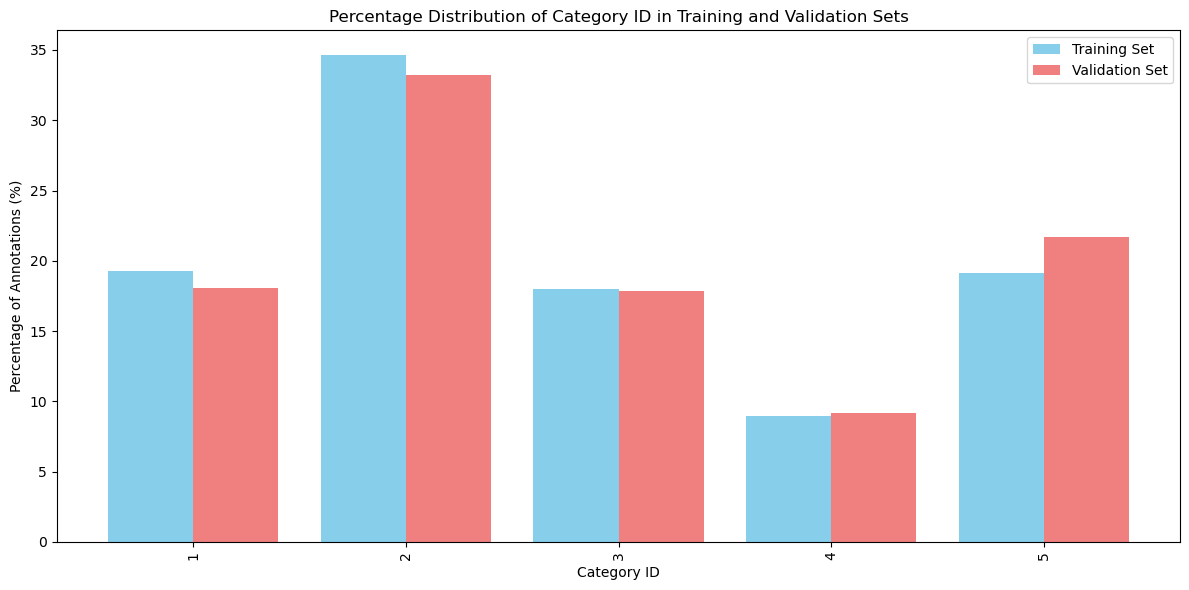

In [102]:
# Calculate the percentage of each category_id in the training set
category_percentage_train = (train_split['category_id'].value_counts(normalize=True) * 100).sort_index()

# Calculate the percentage of each category_id in the validation set
category_percentage_val = (val_split['category_id'].value_counts(normalize=True) * 100).sort_index()

# Plot the percentage distribution on the same graph
plt.figure(figsize=(12, 6))

# Plot for the training set
plt.bar(category_percentage_train.index - 0.2, category_percentage_train.values, width=0.4, label='Training Set', color='skyblue')

# Plot for the validation set
plt.bar(category_percentage_val.index + 0.2, category_percentage_val.values, width=0.4, label='Validation Set', color='lightcoral')

# Adding labels and title
plt.xlabel('Category ID')
plt.ylabel('Percentage of Annotations (%)')
plt.title('Percentage Distribution of Category ID in Training and Validation Sets')
plt.xticks(rotation=90)

# Adding a legend to differentiate between training and validation
plt.legend()

plt.tight_layout()
plt.show()

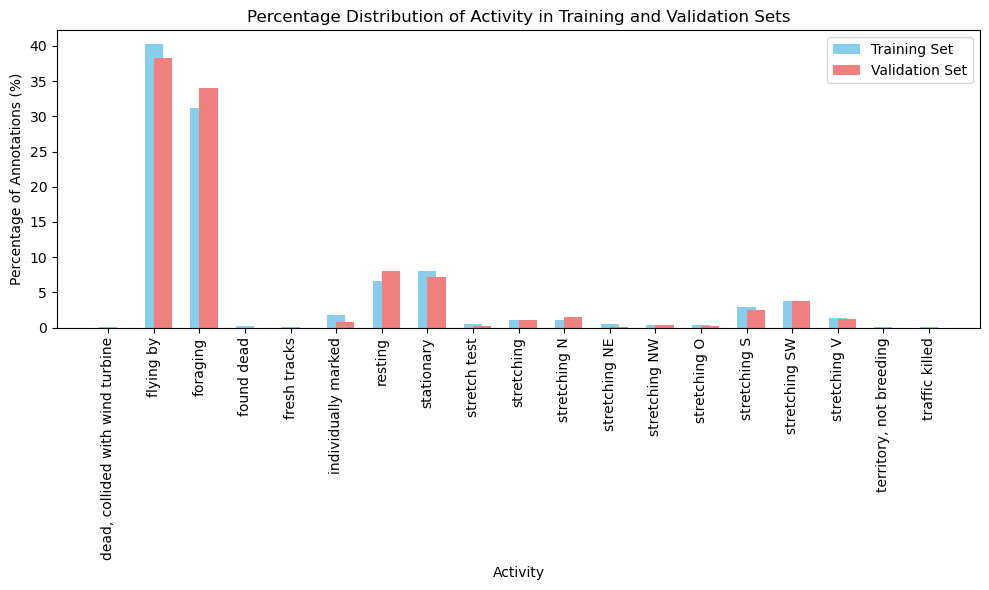

In [103]:
# Calculate the percentage of each activity in the training set
activity_percentage_train = (train_split['activity'].value_counts(normalize=True) * 100).sort_index()

# Calculate the percentage of each activity in the validation set
activity_percentage_val = (val_split['activity'].value_counts(normalize=True) * 100).sort_index()

# Plot the distribution on the same graph
plt.figure(figsize=(10, 6))

# Plot for the training set
plt.bar(activity_percentage_train.index, activity_percentage_train.values, width=0.4, label='Training Set', color='skyblue', align='center')

# Plot for the validation set, adjusting the position so it doesn't overlap with the training set bars
plt.bar(activity_percentage_val.index, activity_percentage_val.values, width=0.4, label='Validation Set', color='lightcoral', align='edge')

# Adding labels and title
plt.xlabel('Activity')
plt.ylabel('Percentage of Annotations (%)')
plt.title('Percentage Distribution of Activity in Training and Validation Sets')
plt.xticks(rotation=90)

# Adding a legend to differentiate between training and validation
plt.legend()

plt.tight_layout()
plt.show()

In [104]:
train_split.to_csv('train_sep_sightings.csv', index=False)
val_split.to_csv('val_sep_sightings.csv', index=False)


In [ ]:
# def save_coco_to_json(coco_obj, output_file):
#     with open(output_file, 'w') as f:
#         json.dump(coco_obj.dataset, f)

# # Save the modified COCO object back to a JSON file
# output_file = LABEL_DIR + '/modified_train_annotations.json'
# save_coco_to_json(train_coco, output_file)
# # output_file = LABEL_DIR + '/modified_val_annotations.json'
# # save_coco_to_json(val_coco, output_file)

# try with dataloader

In [ ]:
# in dataset.ipynb